# Get relative velocity

In [1]:
from libs.Environments.Circular_GU_Sat import *
import numpy as np

kms = [600, 1000, 1500]
for km in kms:
    env = Circular_GU_Sat(
        satellite_num=1,
        orbit_alts=[km],
        ground_user_num=1
    )

    x_rel_vel = []
    y_rel_vel = []
    z_rel_vel = []

    x_doppler = []
    y_doppler = []
    z_doppler = []

    angles = []
    distances = []

    count = 0  

    while(True):
        # if(count % 180 == 0):
            # env.plot()
            # print("x Length : ", len(x_rel_vel))
            # print("y Length : ", len(y_rel_vel))
            # print("z Length : ", len(z_rel_vel))

        v = env.calc_relative_velocities()

        if(v != None):
            vx, vy, vz = v
            x_rel_vel.append(vx)
            y_rel_vel.append(vy)
            z_rel_vel.append(vz)
            angles.append(env.get_angle())
            distances.append(env.get_distance())

        count += 1

        if(count == 180): # 3시간
            break
        env.rotate(60)

    np.save(str(km) + "_angle", angles)
    np.save(str(km) + "_distance", distances)
    np.save(str(km) + "_x_axis_velocity_change.npy", x_rel_vel)
    np.save(str(km) + "_y_axis_velocity_change.npy", y_rel_vel)
    np.save(str(km) + "_z_axis_velocity_change.npy", z_rel_vel)

# Calculate snr

In [2]:
from libs.Channels.SNR import *
from libs.Channels.DataRate import *
Gb = 1024*1024*1024
kms = [600, 1000, 1500]

for alt in kms:
    ang = np.load(str(alt)+"_angle.npy")
    dist = np.load(str(alt) + "_distance.npy")

    cps = []

    x_vel = np.load(str(alt)+"_x_axis_velocity_change.npy")
    y_vel = np.load(str(alt)+"_y_axis_velocity_change.npy")

    for idx, vx in enumerate(x_vel):
        v = math.sqrt(vx**2 + y_vel[idx]**2)
        snr = get_snr_fspl_doppler(distance=dist[idx], 
                                    velocity=v,
                                    angle=ang[idx])
        cps.append(shannon_hartley(snr)/Gb)

    np.save(str(alt) + "_cp", cps)

for alt in kms:
    ang = np.load(str(alt)+"_angle.npy")
    dist = np.load(str(alt) + "_distance.npy")

    cps = []

    x_vel = np.load(str(alt)+"_x_axis_velocity_change.npy")
    y_vel = np.load(str(alt)+"_y_axis_velocity_change.npy")

    for idx, vx in enumerate(x_vel):
        v = math.sqrt(vx**2 + y_vel[idx]**2)
        snr = get_snr_fspl_doppler(distance=dist[idx])
        cps.append(shannon_hartley(snr)/Gb)

    np.save(str(alt) + "_cp_no_doppler", cps)

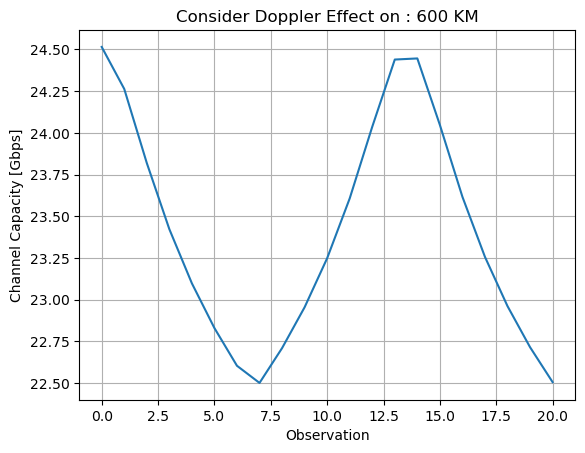

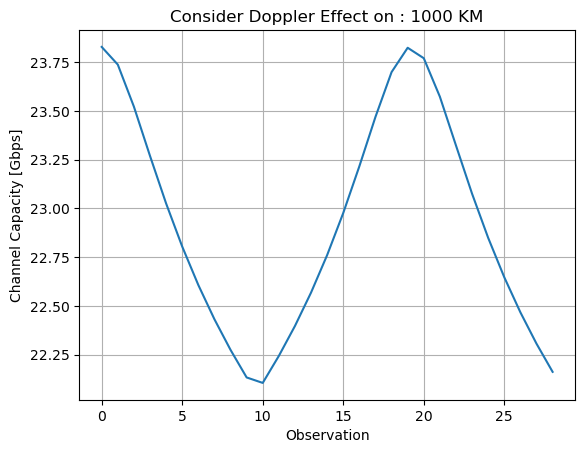

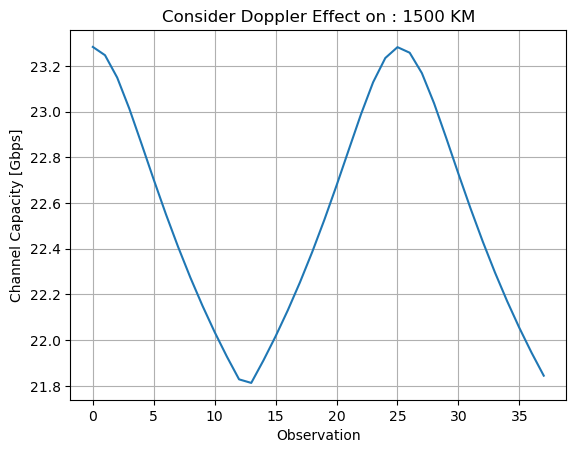

In [3]:
import matplotlib.pyplot as plt 

for alt in kms:
    plt.title("Consider Doppler Effect on : "+ str(alt) + " KM")
    cp = np.load(str(alt) + "_cp.npy")

    plt.xlabel('Observation')
    plt.ylabel('Channel Capacity [Gbps]')
    plt.grid(True)
    plt.plot(cp)
    plt.show()

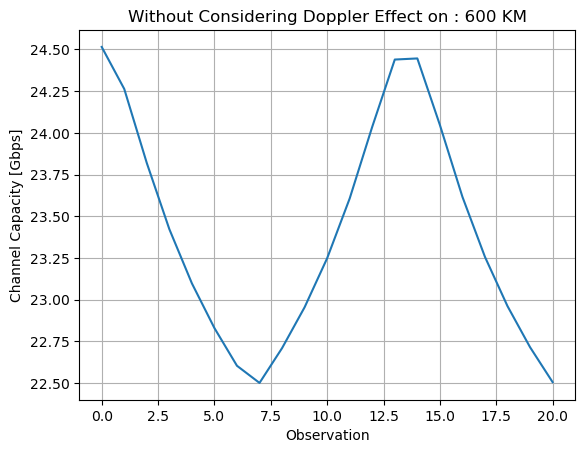

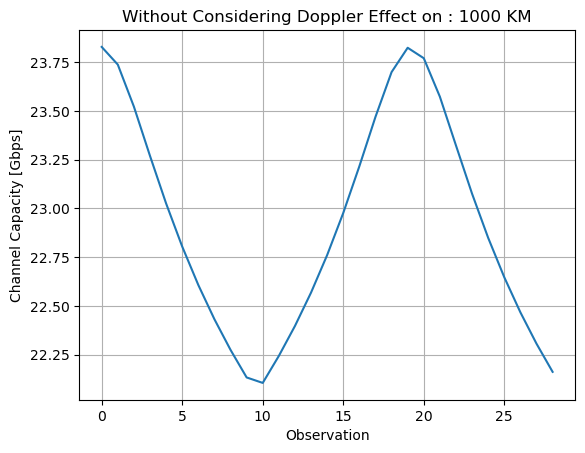

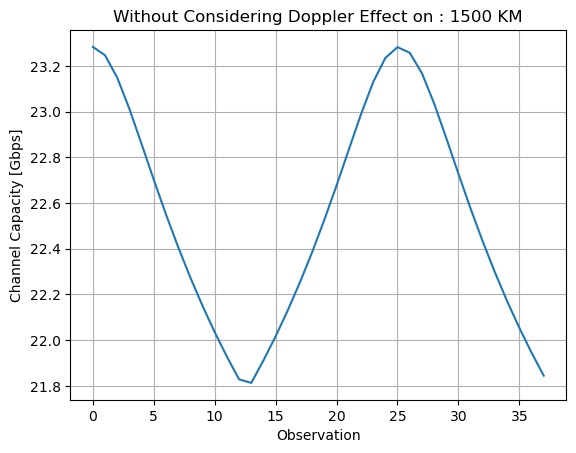

In [4]:
import matplotlib.pyplot as plt 

for alt in kms:
    plt.title("Without Considering Doppler Effect on : "+ str(alt) + " KM")
    cp = np.load(str(alt) + "_cp_no_doppler.npy")

    plt.xlabel('Observation')
    plt.ylabel('Channel Capacity [Gbps]')
    plt.grid(True)
    plt.plot(cp)
    plt.show()